# Importing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pathlib import Path # I include this so that it will run to all the places with giving error
directory = Path(__name__).parent.absolute()

In [3]:
data = pd.read_csv(str(directory)+'/Datasets/Advertising.csv')

In [4]:
data.shape

(200, 4)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### Ploting data

In [6]:
x = data["TV"]

In [7]:
y = data["sales"]

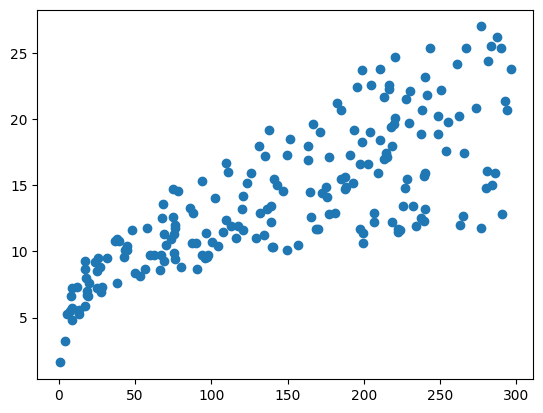

In [8]:
plt.scatter(x,y)

### Creating Sub Plot

Text(0.5, 1.0, 'Newspaper Sales')

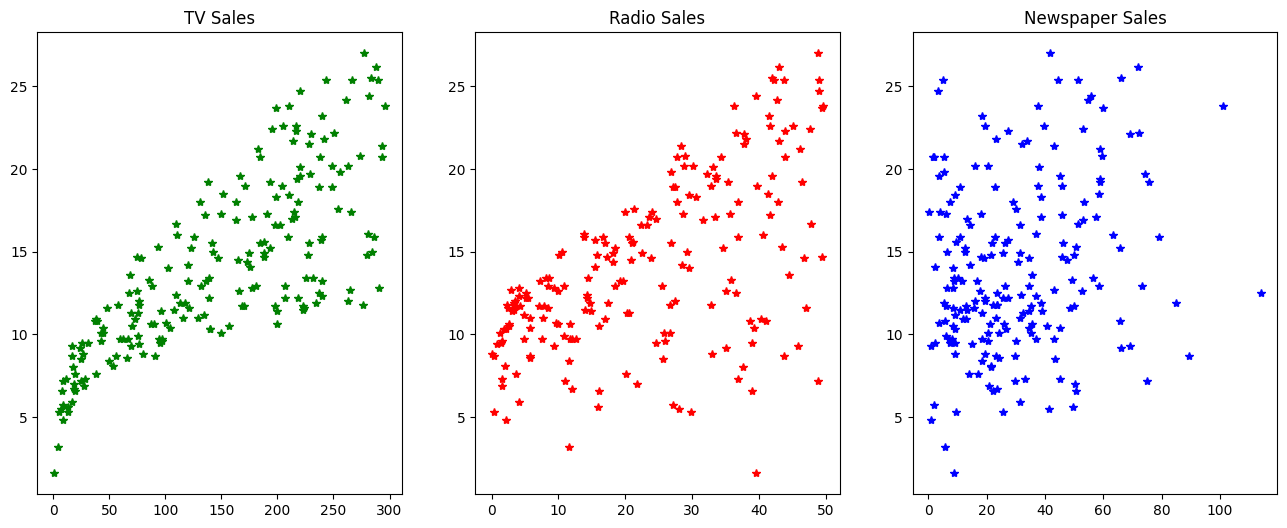

In [9]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))
axes[0].plot(data['TV'],data['sales'],'*',color='g')
axes[0].set_title('TV Sales')
axes[1].plot(data['radio'],data['sales'],'*',color='r')
axes[1].set_title('Radio Sales')
axes[2].plot(data['newspaper'],data['sales'],'*',color='b')
axes[2].set_title('Newspaper Sales')

- Another method via `seaborn`

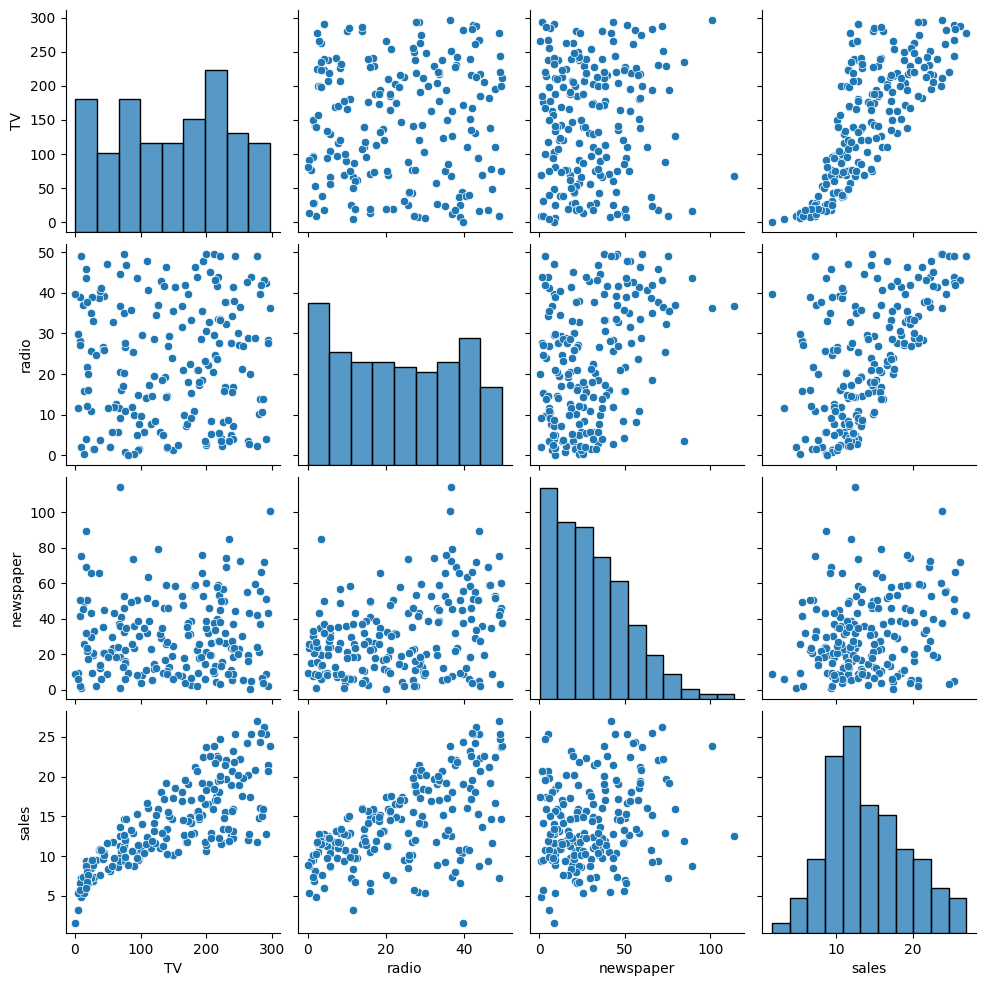

In [10]:
sns.pairplot(data)

### Separate the data points

In [11]:
X = data.drop('sales',axis=1)

In [12]:
y = data['sales']

In [13]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [14]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [15]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
xtrain.shape

(160, 3)

In [17]:
xtest.shape

(40, 3)

### Moddel Creaton

- Imporing model class from model family

In [18]:
from sklearn.linear_model import LinearRegression

- creating instances of model class parameter

In [19]:
model = LinearRegression()

In [20]:
model

LinearRegression()

In [21]:
model.fit(xtrain,ytrain)

LinearRegression()

In [22]:
test_prediction = model.predict(xtest)

In [23]:
test_prediction

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

- Test Prediction

In [24]:
model.predict([[11,55,88]])

/home/runner/workspace/.pythonlibs/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([14.11979808])

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [26]:
from math import sqrt
MAE = mean_absolute_error(ytest,test_prediction)
MSE = mean_squared_error(ytest,test_prediction)
RMSE = sqrt(MSE)

In [27]:
MAE

1.4607567168117603

In [28]:
MSE

3.1740973539761033

In [29]:
RMSE

1.78159966153345

In [30]:
model.score(xtest,ytest)

0.899438024100912

- Fomulla based checking
`Y = β₀ + β₁X₁ + β₂X₂ + ... + βₚXₚ + ε`

In [31]:
model.intercept_

np.float64(2.979067338122629)

In [32]:
model.coef_

array([0.04472952, 0.18919505, 0.00276111])

In [33]:
model.intercept_ + model.coef_[0]*11 + model.coef_[1]*55 + model.coef_[2] * 88

np.float64(14.11979807520953)

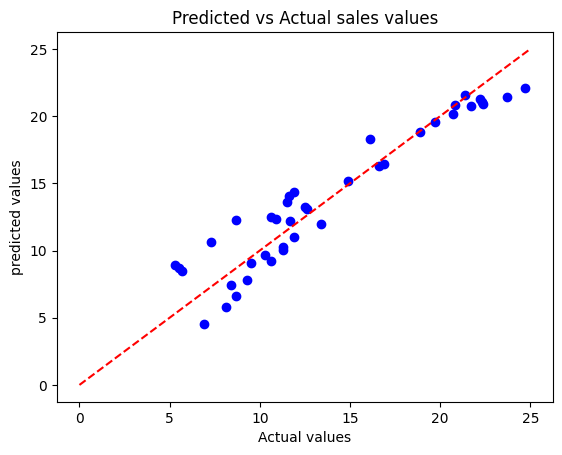

In [35]:
plt.scatter(ytest,test_prediction,color='blue')
plt.plot([0,25],[0,25],color='red',linestyle='--')
plt.title('Predicted vs Actual sales values')
plt.xlabel('Actual values')
plt.ylabel('predicted values')
plt.show()